# Derivative of algorithm is in my Medium
https://roger010620.medium.com/sequential-bayesian-learning-3659315470dc
## The posterior distribution:
$$ p(w|t)=N(w|m_N,S_N) \text{ with the given prior }p(w)=N(w|m_0=0,S_0^{-1}=10^{-6}I)$$ 
### The precision of likelihood function:
$$p(t|w,\beta)\text{ is chosen to be }\beta=1$$
## Given basic function:
$$ \phi_j(x)=\sigma(\frac{ x-\mu_j }{ s }) $$
### In this exercise, please take the following parameter settings for your basis functions:
$$M=3,s=0.1\text{ and }\mu_j=\frac{ 2j }{ M }\text{ with }j=0,...,(M-1)$$
please take the data size to be N = 5, 10, 30 and 80 for the following two questions:

1. please generate five curve samples from the parameter posterior dis-tribution.

2. please plot the predictive distribution of target value t and show the mean curve and the region of variance with one standard deviation on either side of the mean curve.<br>

In addition, please arbitrarily select two weights by yourself and carefully plot the corresponding prior distributions when N = 5, 10, 30 and 80.

In [5]:
import scipy.io as sio 
import matplotlib.pyplot as plt 
from numpy.random import multivariate_normal as normal #生成一個多元常態分布矩阵
import scipy.stats as stats
from Sequential_Bayesian_Learning import Bayesian_Learning
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 

data=sio.loadmat('1_data.mat')
x = data['x']
t = data['t']

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))
def basic_function(M, X, s):
    X2 = X
    for i in range(M):
        X1 = sigmoid((X-2*i/M)/0.1)
        X2 = np.concatenate((X2,X1),axis=1)
    return X2[:,1:]
X2 = basic_function(3, x, 0.1)

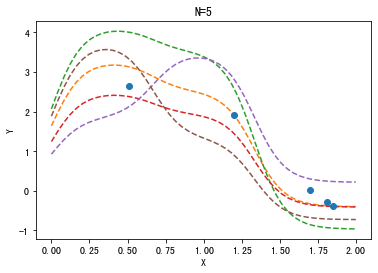

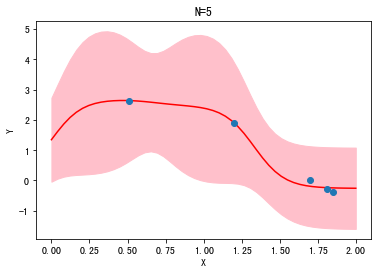

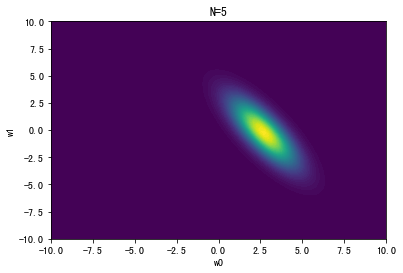

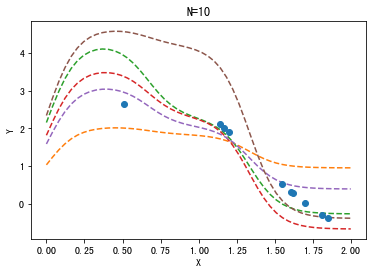

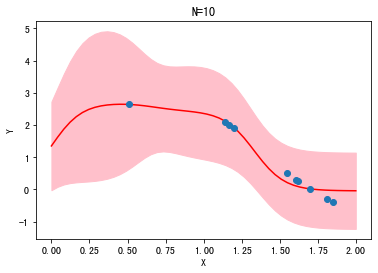

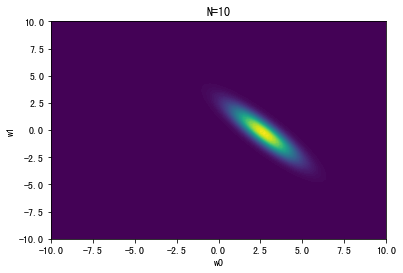

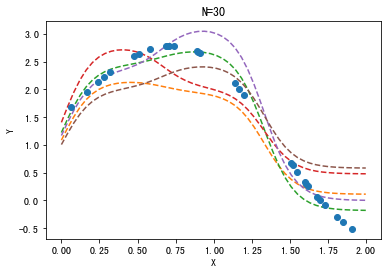

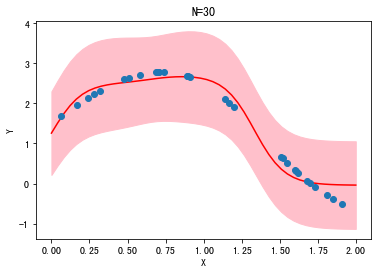

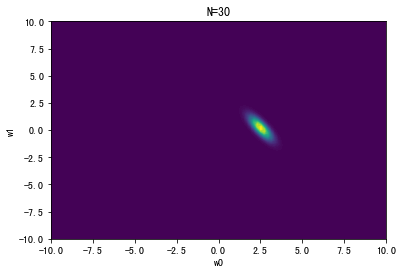

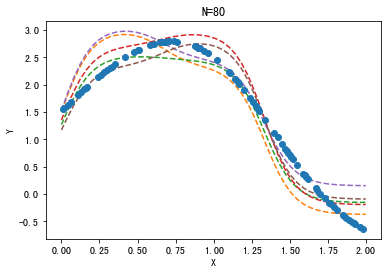

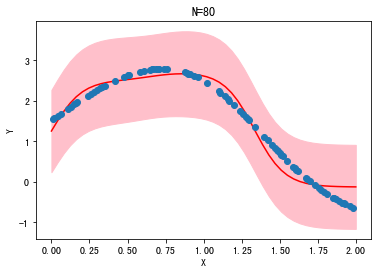

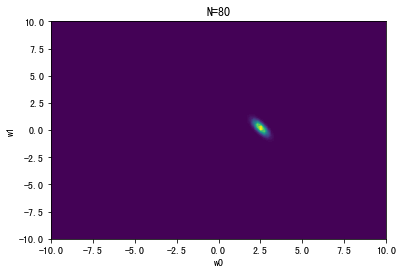

In [6]:
N = [5,10,30,80]
for i in N:
    plt.figure()
    plt.plot(x[:i],t[:i],'o')
    BL = Bayesian_Learning(X2[:i],t[:i],10**-6,1)
    m_N, S_N = BL.posterior()
    m_N = m_N.reshape(-1)
    line = np.linspace(0., 2., 50)
    ws = normal(m_N, S_N, 5)
    line1 = basic_function(3, line.reshape(-1,1), 0.1)
    for w in ws:
        value = [point.T.dot(w) for point in line1]
        plt.plot(line, value, linestyle ='--', zorder = 1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('N='+str(i))
    plt.figure()
    plt.plot(x[:i],t[:i],'o')
    mx = []
    vx = []
    for point in line1:
        a1,a2 = BL.posterior_predictive(point)
        mx.append(a1[0])
        vx.append(a2)
    mx = np.reshape(np.asarray(mx), len(mx))
    vx = np.reshape(np.asarray(vx), len(vx))
    plt.plot(line, mx, linestyle = '-', zorder = 1, color = 'red')
    plt.fill_between(line, mx-vx, mx+vx, color = 'pink') #範圍內塗色
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('N='+str(i))
    mn1 = m_N[:2]
    sn1 = S_N[:2,:2]
    w = np.linspace(-10, 10, 100)
    W = np.dstack(np.meshgrid(w, w))
    prior_vals = stats.multivariate_normal(mn1, sn1).pdf(W)
    plt.figure()
    plt.contourf(w, w, prior_vals, 100)
    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.title('N='+str(i))